# AMSTERDAM HOUSE PREDICTION
Welcome to my first machine learning project. I tried to predict house prices of Amsterdam. I took this data from kaggle:
https://www.kaggle.com/abirchatterjee17/house-price-prediction/notebook#Understanding-the-Data

## Let's start with libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Read the data and understand
Data has 7 meaningful columns and an index column.  

Address: Residential address

Zip: Residential Zip code

Area: Residential area in square meters.

Room: Number of rooms at residence.

Lon: Longitude coordinates.

Lat: Latitude coordinates.


In [2]:
df = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv',  sep=',')
df.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


# Data Preprocessing

In [3]:
df=df.drop("Unnamed: 0",axis=1)
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [4]:
df.shape

(924, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 50.7+ KB


In [6]:
# We should split adress and zip columns with ";" by new columns.

In [7]:
df['Location'] = df['Address'].apply(lambda x: str(x.split(',')[0]))
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat,Location
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,Blasiusstraat 8 2
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,Kromme Leimuidenstraat 13 H
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,Zaaiersweg 11 A
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,Tenerifestraat 40
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,Winterjanpad 21


In [8]:
def name_extraction(string):
    list = string.split()
    word = []
    number = [] 
    for i in list:
        if i.isalpha() == True: 
            word.append(i)
        else:
            break
    word = ' '.join(word)
    return word

In [9]:
df['Street_Name'] = df['Location'].apply(lambda x: name_extraction(x))
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat,Location,Street_Name
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,Blasiusstraat 8 2,Blasiusstraat
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,Kromme Leimuidenstraat 13 H,Kromme Leimuidenstraat
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,Zaaiersweg 11 A,Zaaiersweg
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,Tenerifestraat 40,Tenerifestraat
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,Winterjanpad 21,Winterjanpad


In [10]:
df['ZipNo'] = df['Zip'].apply(lambda x: int(x.split(' ')[0]))
df['AreaCode'] = df['Zip'].apply(lambda x: str(x.split(' ')[1]))
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat,Location,Street_Name,ZipNo,AreaCode
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,Blasiusstraat 8 2,Blasiusstraat,1091,CR
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,Kromme Leimuidenstraat 13 H,Kromme Leimuidenstraat,1059,EL
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,Zaaiersweg 11 A,Zaaiersweg,1097,SM
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,Tenerifestraat 40,Tenerifestraat,1060,TH
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,Winterjanpad 21,Winterjanpad,1036,KN


In [11]:
df= df.drop(['Address','Zip'],axis=1)
df.head()

,Price,Area,Room,Lon,Lat,Location,Street_Name,ZipNo,AreaCode
0,685000.0,64,3,4.907736,52.356157,Blasiusstraat 8 2,Blasiusstraat,1091,CR
1,475000.0,60,3,4.850476,52.348586,Kromme Leimuidenstraat 13 H,Kromme Leimuidenstraat,1059,EL
2,850000.0,109,4,4.944774,52.343782,Zaaiersweg 11 A,Zaaiersweg,1097,SM
3,580000.0,128,6,4.789928,52.343712,Tenerifestraat 40,Tenerifestraat,1060,TH
4,720000.0,138,5,4.902503,52.410538,Winterjanpad 21,Winterjanpad,1036,KN


In [12]:
df= df.drop('Location',axis=1)

In [13]:
df.head()

,Price,Area,Room,Lon,Lat,Street_Name,ZipNo,AreaCode
0,685000.0,64,3,4.907736,52.356157,Blasiusstraat,1091,CR
1,475000.0,60,3,4.850476,52.348586,Kromme Leimuidenstraat,1059,EL
2,850000.0,109,4,4.944774,52.343782,Zaaiersweg,1097,SM
3,580000.0,128,6,4.789928,52.343712,Tenerifestraat,1060,TH
4,720000.0,138,5,4.902503,52.410538,Winterjanpad,1036,KN


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


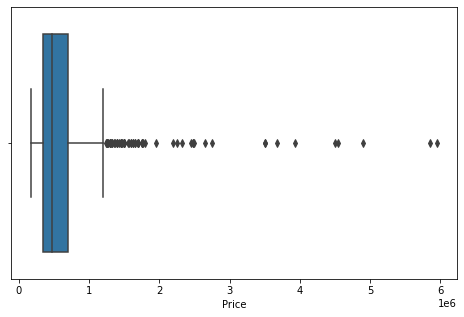

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot('Price',data=df);

### Outliers

In [15]:
Q1=df['Price'].quantile(0.25)
Q3=df['Price'].quantile(0.75)
IQR=(Q3-Q1)
maxprice=Q3+ 1.5* IQR
print(maxprice)

1225000.0


In [16]:
# runned 2 times, removed, % 7,72
outli = df[df['Price'] >= maxprice]
outliers_count = outli['Price'].count()
data_count = df['Price'].count()
print('Percentage removed: ' + str(round(outliers_count/data_count * 100, 2)) + '%')

Percentage removed: 7.72%


In [17]:
df= df[df['Price'] <= maxprice]

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


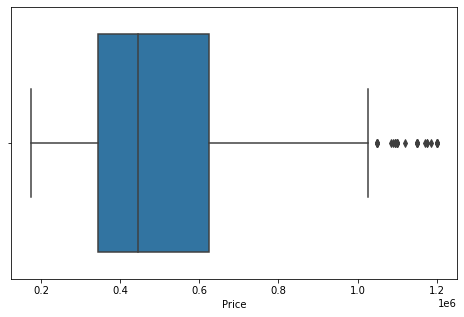

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot('Price',data=df);

### Encoding and preparing the model..

In [19]:
y = df['Price']
X = df.drop('Price', axis = 1)

X.head()

,Area,Room,Lon,Lat,Street_Name,ZipNo,AreaCode
0,64,3,4.907736,52.356157,Blasiusstraat,1091,CR
1,60,3,4.850476,52.348586,Kromme Leimuidenstraat,1059,EL
2,109,4,4.944774,52.343782,Zaaiersweg,1097,SM
3,128,6,4.789928,52.343712,Tenerifestraat,1060,TH
4,138,5,4.902503,52.410538,Winterjanpad,1036,KN


In [20]:
# Labelencoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['Street_Name','AreaCode']
for i in var_mod:
    X[i] = le.fit_transform(X[i])

# Understanding correlations

In [21]:
df.corr()

,Price,Area,Room,Lon,Lat,ZipNo
Price,1.000000,0.717062,0.478011,-0.031655,0.108006,-0.233738
Area,0.717062,1.000000,0.741653,0.018257,-0.032262,-0.005487
Room,0.478011,0.741653,1.000000,-0.039221,-0.053695,0.056709
Lon,-0.031655,0.018257,-0.039221,1.000000,-0.211604,0.172892
Lat,0.108006,-0.032262,-0.053695,-0.211604,1.000000,-0.728509
ZipNo,-0.233738,-0.005487,0.056709,0.172892,-0.728509,1.000000


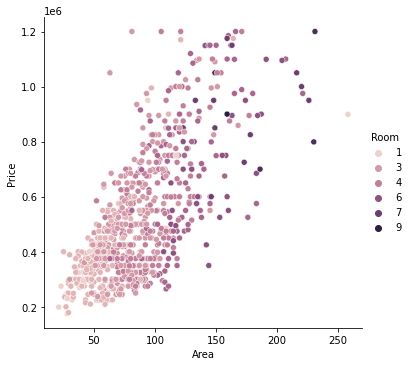

In [22]:
sns.relplot(x="Area", y="Price", hue="Room", data=df)
plt.show()

<AxesSubplot:>

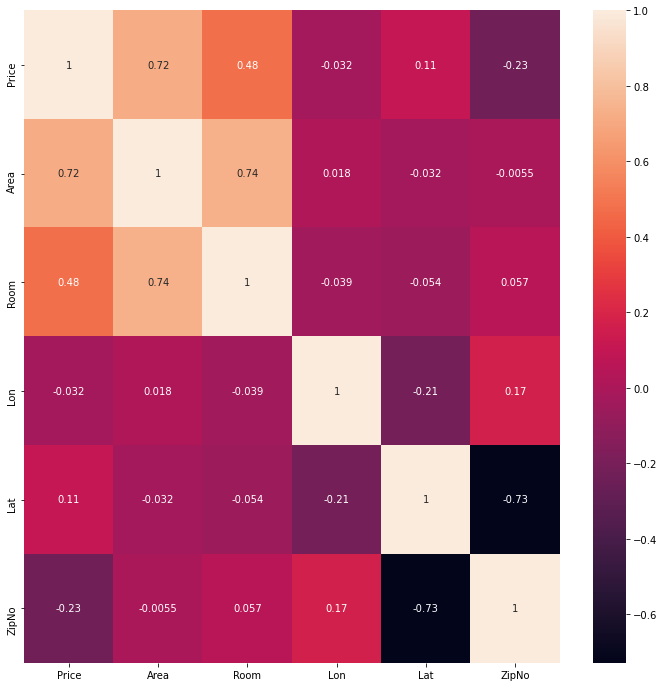

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot = True)

In [24]:
df= df.dropna()

# Model Building

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [27]:
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)

pred= model.predict(X_test)

In [28]:
model.score(X_train, y_train)


0.5760361329645953

In [29]:
model.score(X_test, y_test)


0.5606910163728516

In [30]:
from sklearn import metrics
import math
print(math.sqrt(metrics.mean_squared_error(y_test, pred)))

156746.1475912188


In [31]:
model.intercept_

29808545.34955046

In [32]:
model.coef_

array([ 4.78275687e+03, -1.02226789e+04, -6.59151443e+04, -5.17844386e+05,
        2.59840380e+01, -2.11667760e+03, -7.39130776e+00])

In [33]:
X

,Area,Room,Lon,Lat,Street_Name,ZipNo,AreaCode
0,64,3,4.907736,52.356157,58,1091,48
1,60,3,4.850476,52.348586,271,1059,82
2,109,4,4.944774,52.343782,559,1097,250
3,128,6,4.789928,52.343712,457,1060,264
4,138,5,4.902503,52.410538,553,1036,153
...,...,...,...,...,...,...,...
919,117,1,4.927757,52.354173,407,1097,3
920,72,3,4.890612,52.414587,261,1033,47
921,51,3,4.856935,52.363256,451,1058,7
922,113,4,4.965731,52.375268,236,1095,177


In [34]:
y

0      685000.0
1      475000.0
2      850000.0
3      580000.0
4      720000.0
         ...   
919    750000.0
920    350000.0
921    350000.0
922    599000.0
923    300000.0
Name: Price, Length: 849, dtype: float64